<a href="https://colab.research.google.com/github/dibkb/tensorflow-udemy/blob/main/Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
def plot_history(model_history):
  df = pd.DataFrame(model_history.history)
  loss = df['loss']
  accuracy = df['accuracy']
  val_loss = df['val_loss']
  val_accuracy = df['val_accuracy']
  epochs = range(len(df['val_loss']))

    # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

   # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [2]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2023-12-13 16:17:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.207, 173.194.74.207, 173.194.192.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   197MB/s    in 0.8s    

2023-12-13 16:17:50 (197 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
# Create training and test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [4]:
import tensorflow as tf
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
SEED = 42
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,

                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode = "categorical",
                                                                 image_size=IMAGE_SIZE,seed = SEED)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,

                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode = "categorical",
                                                                 image_size=IMAGE_SIZE,seed = SEED)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [5]:
print("Classnames available \n")
for name in train_data.class_names:
  print(name)

Classnames available 

chicken_curry
chicken_wings
fried_rice
grilled_salmon
hamburger
ice_cream
pizza
ramen
steak
sushi


In [6]:
import matplotlib.pyplot as plt
import random
def plotrandom():
  take = random.randint(1, int(750/BATCH_SIZE))
  for images, labels in train_data.take(take):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
    for i in range(3):
        for j in range(3):
            axes[i, j].imshow(images[i * 3 + j]/255.,)
            axes[i, j].axis('off')  # Disable axes
    return


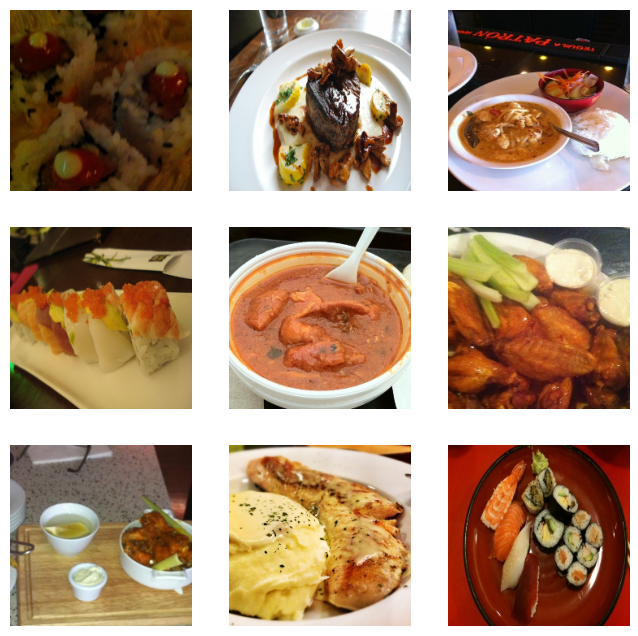

In [7]:
plotrandom()

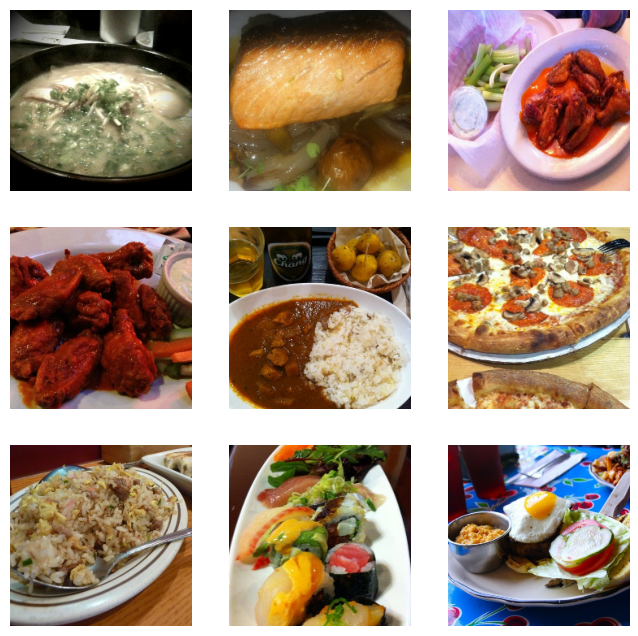

In [8]:
plotrandom()

In [9]:
# Building a base model
base = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base.trainable = False

input = tf.keras.layers.Input(shape = IMAGE_SIZE + (3,),name="input layer")
x = base(input)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

output = tf.keras.layers.Dense(10,activation="softmax")(x)

model_zero = tf.keras.Model(input,output)


24274472/24274472 [==============================] - 0s 0us/step


In [10]:
# compile the model
model_zero.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
# training the model
model_zero_history = model_zero.fit(train_data,epochs = 5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
24/24 [==============================] - 27s 477ms/step - loss: 1.8570 - accuracy: 0.4227 - val_loss: 1.3066 - val_accuracy: 0.7112
Epoch 2/5
24/24 [==============================] - 7s 275ms/step - loss: 1.1306 - accuracy: 0.7493 - val_loss: 0.8927 - val_accuracy: 0.8032
Epoch 3/5
24/24 [==============================] - 8s 337ms/step - loss: 0.8335 - accuracy: 0.8227 - val_loss: 0.7190 - val_accuracy: 0.8340
Epoch 4/5
24/24 [==============================] - 7s 283ms/step - loss: 0.6818 - accuracy: 0.8480 - val_loss: 0.6251 - val_accuracy: 0.8536
Epoch 5/5
24/24 [==============================] - 9s 328ms/step - loss: 0.5970 - accuracy: 0.8613 - val_loss: 0.5709 - val_accuracy: 0.8520


In [11]:
model_zero.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


<ipython-input-20-d4be0023ac5d>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


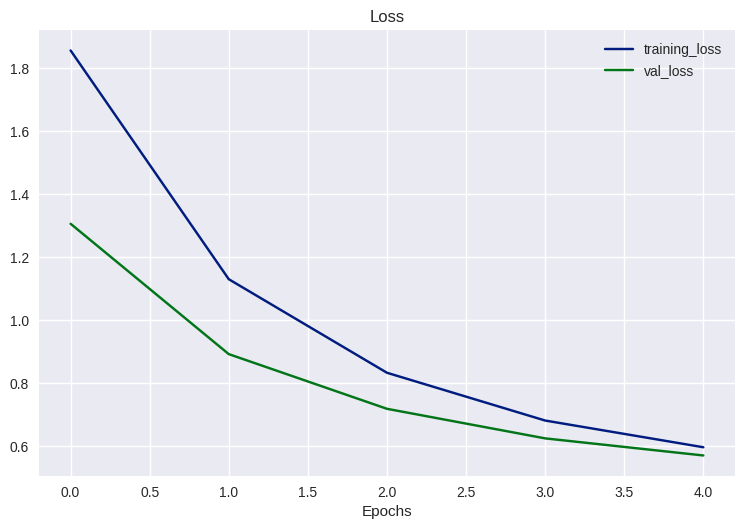

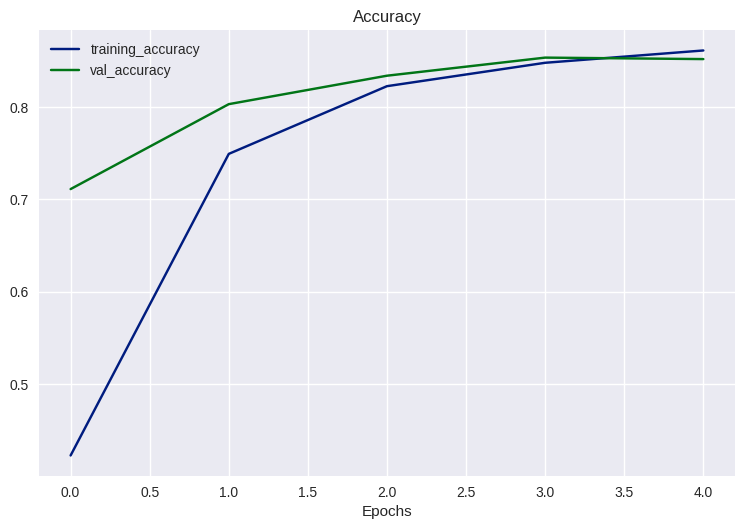

In [20]:
plt.style.use('seaborn-dark-palette')
plot_history(model_zero_history)